<a href="https://colab.research.google.com/github/eatmads/online-shopper-intention/blob/main/classifying_online_shopper_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying Online Shopper Intention

In [ ]:
### Begin code

# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
shopping = pd.read_csv('/content/drive/MyDrive/BINUS/online_shoppers_intention.csv')
shopping.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

## Exploratory Data Analysis

In [ ]:
# Describe the dataset
shopping.describe(include='all')

Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 34.472398       31.731468              1194.746220   
std                 140.749294       44.475503              1913.669288   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000        7.000000               184.137500   
50%                   0.000000       18.000000               598.936905   
75%                   0.000000       38.000000              1464.157214   
max                2549.375000      705.000000             63973.522230   

         BounceRates     ExitRates    PageValues    SpecialDay  Month  \
count   12330.000000  12330.000000  12330.000000  12330.000000  12330   
unique           NaN           NaN           NaN           NaN     10   
top              NaN           NaN           NaN           NaN    May   
freq             NaN           NaN           NaN           NaN   3364   
mean        0.022191      0.043073      5.889258      0.061427    NaN   
std         0.048488      0.048597     18.568437      0.198917    NaN   
min         0.000000      0.000000      0.000000      0.000000    NaN   
25%         0.000000      0.014286      0.000000      0.000000    NaN   
50%         0.003112      0.025156      0.000000      0.000000    NaN   
75%         0.016813      0.050000      0.000000      0.000000    NaN   
max         0.200000      0.200000    361.763742      1.000000    NaN   

        OperatingSystems       Browser        Region   TrafficType  \
count       12330.000000  12330.000000  12330.000000  12330.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean            2.124006      2.357097      3.147364      4.069586   
std             0.911325      1.717277      2.401591      4.025169   
min             1.000000      1.000000      1.000000      1.000000   
25%             2.000000      2.000000      1.000000      2.000000   
50%             2.000000      2.000000      3.000000      2.000000   
75%             3.000000      2.000000      4.000000      4.000000   
max             8.000000     13.000000      9.000000     20.000000   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10551    9462   10422  
mean                  NaN     NaN     NaN  
std                   NaN     NaN     NaN  
min                   NaN     NaN     NaN  
25%                   NaN     NaN     NaN  
50%                   NaN     NaN     NaN  
75%                   NaN     NaN     NaN  
max                   NaN     NaN     NaN

In [ ]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [ ]:
# Checking for number of unique values for each feature

uniques = shopping.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


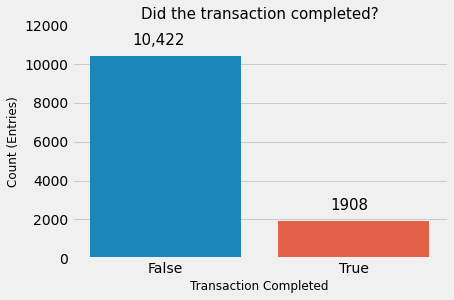

In [ ]:
# Visualize the data

sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Did the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()


## Feature Cleaning

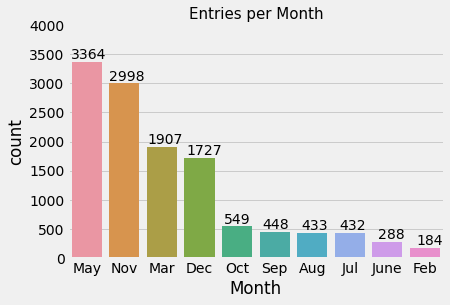

In [ ]:
monthly = shopping['Month'].value_counts()

sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

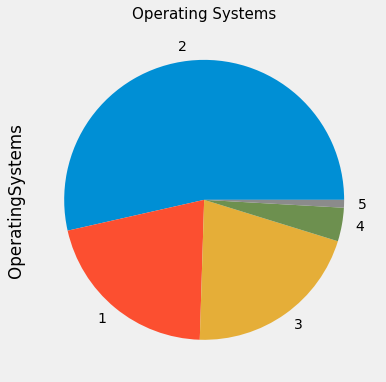

In [ ]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

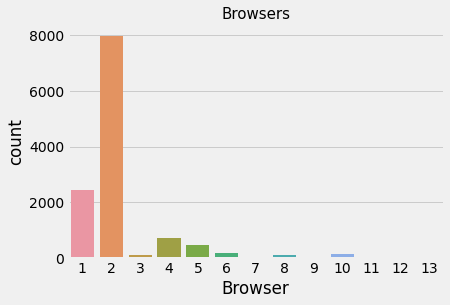

In [ ]:
sns.countplot(shopping['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

In [ ]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

## Label and One Hot Encoding

In [ ]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [ ]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [ ]:
print ("Number of training examples: {}".format(X_train.count()))
print ("Number of testing examples: {}".format(X_test.count()))

Number of training examples: Administrative                    9864
Administrative_Duration           9864
Informational                     9864
Informational_Duration            9864
ProductRelated                    9864
ProductRelated_Duration           9864
BounceRates                       9864
ExitRates                         9864
PageValues                        9864
SpecialDay                        9864
Visitor_Type_Other                9864
Visitor_Type_Returning_Visitor    9864
dtype: int64
Number of testing examples: Administrative                    2466
Administrative_Duration           2466
Informational                     2466
Informational_Duration            2466
ProductRelated                    2466
ProductRelated_Duration           2466
BounceRates                       2466
ExitRates                         2466
PageValues                        2466
SpecialDay                        2466
Visitor_Type_Other                2466
Visitor_Type_Returning_Visitor   

## Naive Bayes Classifier



In [ ]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))


Gaussian Naive Bayes model accuracy(in %): 84.63


The area under the ROC curve is: 0.71


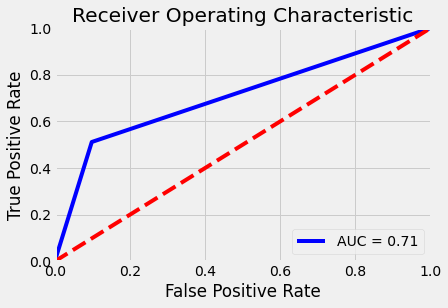

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Naive Bayes Classifier
roc_value = roc_auc_score(y_test, y_pred)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
random_auc = roc_auc_score(y_test, y_pred)
print('Naive Bayes - AUC = %.3f' % (random_auc))

Naive Bayes - AUC = 0.707


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


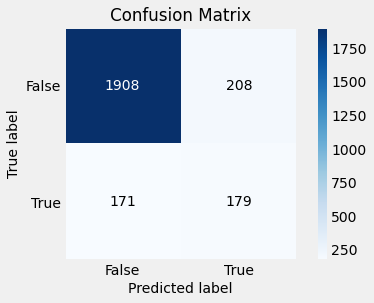

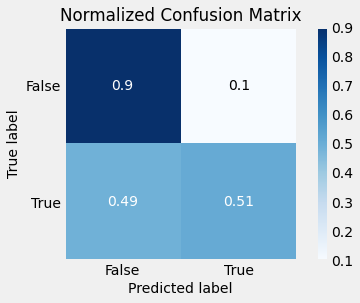

In [ ]:
#Confusion Matrix Preparation
labels_true = y_test
labels_pred = y_pred
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## Random Forest Classifier

In [ ]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


The area under the ROC curve is: 0.72


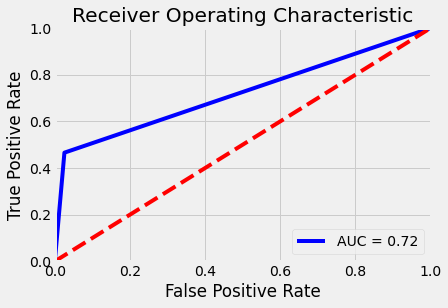

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_pred_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
random_auc = roc_auc_score(y_test, y_pred_rfc)
print('Random Forest - AUC = %.3f' % (random_auc))

Random Forest - AUC = 0.720


In [ ]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


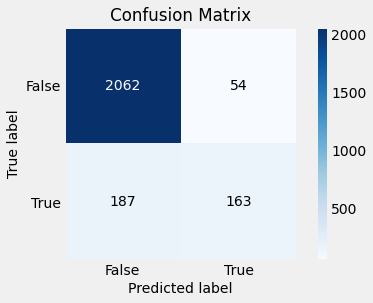

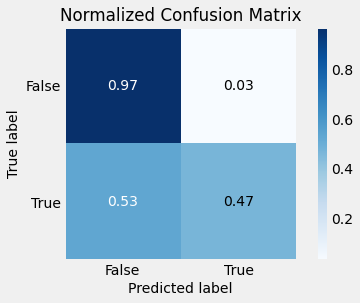

In [ ]:
#Confusion Matrix Preparation
labels_true = y_test
labels_pred = y_pred_rfc
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## Decision Tree Classifier



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BINUS/online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

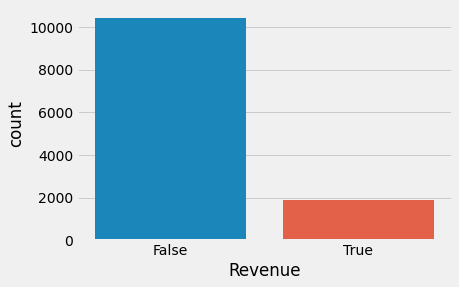

In [ ]:
sns.countplot(x='Revenue', data=df)

In [ ]:
df.drop(['Month', 'Browser', 'OperatingSystems', 'Region','TrafficType','Weekend'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Revenue'] = df.Revenue.astype("category").cat.codes

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Revenue', axis=1)
y = df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999726     1.000000  0.999768     0.999863      0.999768
recall        1.000000     0.998500  0.999768     0.999250      0.999768
f1-score      0.999863     0.999249  0.999768     0.999556      0.999768
support    7298.000000  1333.000000  0.999768  8631.000000   8631.000000
_______________________________________________
Confusion Matrix: 
 [[7298    0]
 [   2 1331]]

Test Result:
Accuracy Score: 84.75%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.913972    0.509061  0.847526     0.711516      0.851029
recall        0.904609    0.537391  0.847526     0.721000      0.847526
f1-score      0.909266    0.522843  0.847526     0.716055      0.849198
support    3124.000000  575.000000  

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [ ]:
gs = GridSearchCV(linear_model.Lasso(), {'alpha': [0.95]}, n_jobs= 1, cv=5, verbose=1)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Revenue")

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Neural // MLP Classifier



In [ ]:
pip install dfply


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install eli5

In [ ]:
import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from dfply import *
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import *
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.neural_network import *
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import *
from sklearn.inspection import PartialDependenceDisplay, plot_partial_dependence

from eli5.sklearn import  PermutationImportance
from eli5 import show_weights

plt.style.use('fivethirtyeight')
plot_templ = "seaborn"
plot_width_small = 600
plpt_width_normal = 800
clr_conti = px.colors.diverging.RdYlGn
clr_conti_r = px.colors.diverging.RdYlGn_r
clr_discrete = px.colors.qualitative.Set1
clr_discrete_r = px.colors.qualitative.Set1_r

pp = pprint.PrettyPrinter(indent=4)

In [ ]:
shoppers_data = pd.read_csv('/content/drive/MyDrive/BINUS/online_shoppers_intention.csv')
shoppers_data.sample(10)

In [ ]:
shoppers_data.describe()

In [ ]:
shoppers_data.OperatingSystems = shoppers_data.OperatingSystems.astype(str)
shoppers_data.Browser = shoppers_data.Browser.astype(str)
shoppers_data.Region = shoppers_data.Region.astype(str)
shoppers_data.TrafficType = shoppers_data.TrafficType.astype(str)
print("Columns converted to string")

In [ ]:
vis_data = (
    shoppers_data >>
    group_by(X.Revenue) >>
    summarise(Count = n(X.Revenue))
)
vis_data["Proportion %"] = (vis_data.Count / vis_data.Count.sum()) * 100

fig = px.bar(
    vis_data,
    x='Revenue', 
    y='Proportion %',
    color='Revenue',
    template=plot_templ,
)
fig.update_layout(
    title_text = "Proportion of Revenue Result  - Online Shoppers",   
    showlegend=False,
    width=600,
    height=500)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=3)
fig.append_trace(
    go.Box(
        x=shoppers_data.Revenue,
        y=shoppers_data.PageValues        
    ), row=1, col=1
)
fig.append_trace(
    go.Box(
        x=shoppers_data.Revenue,
        y=shoppers_data.ExitRates                
    ), row=1, col=2
)
fig.append_trace(
    go.Box(
        x=shoppers_data.Revenue,
        y=shoppers_data.BounceRates                
    ), row=1, col=3
)
fig.update_xaxes(title_text="Revenue")
fig.update_yaxes(title_text="PageValues", row=1, col=1)
fig.update_yaxes(title_text="ExitRates", row=1, col=2)
fig.update_yaxes(title_text="BounceRates", row=1, col=3)
fig.update_layout(
    title_text = "Web analytics - Online Shoppers",
    template=plot_templ,
    showlegend=False,
    width=1200,
    height=500)
fig.show()

In [ ]:
rev_values = shoppers_data.Revenue.unique()
col_map = {
    "1": "steelblue",
    "2": "darkorange"
}
fig = make_subplots(rows=1, cols=2)

for rev in rev_values:
    col = "1" if rev == True else "2"
    vis_data = shoppers_data[shoppers_data["Revenue"] == rev]
    fig.add_trace(
        go.Scatter(
            x=vis_data.ProductRelated,
            y=vis_data.ProductRelated_Duration,
            mode="markers",
            marker_color=col_map[col], 
            legendgroup=f"group{col}",
            name=f"Revenue - {rev}",
            showlegend=True
        ), row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=vis_data.Administrative,
            y=vis_data.Administrative_Duration,
            mode="markers",
            marker_color=col_map[col],
            legendgroup=f"group{col}",
            name=f"Revenue - {rev}",  
            showlegend=False                                         
        ), row=1, col=2
    )
fig.update_xaxes(title_text="ProductRelated", row=1, col=1)
fig.update_xaxes(title_text="Administrative", row=1, col=2)
fig.update_yaxes(title_text="ProductRelated_Duration", row=1, col=1)
fig.update_yaxes(title_text="Administrative_Duration", row=1, col=2)
fig.update_layout(
    legend_traceorder="reversed",
    title_text = "Types of Pages - Online Shoppers",
    template = plot_templ,
    width=1200,
    height=500)
fig.show()

In [ ]:
# Encoding revenue and weekend
shoppers_data.Revenue = shoppers_data.Revenue.apply(lambda x: 1 if x == True else 0)
shoppers_data.Weekend = shoppers_data.Weekend.apply(lambda x: 1 if x == True else 0)
print("Encoding revenue and weekend complete")

# Encoding categorical attributes
cat_attributes = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
encoder = OneHotEncoder(handle_unknown='ignore')
trans = encoder.fit_transform(shoppers_data.loc[:, cat_attributes].values)
enc_data = pd.DataFrame(
    trans.toarray(), 
    index=shoppers_data.index.values,
    columns=encoder.get_feature_names(cat_attributes))
prep_data = pd.merge(shoppers_data, enc_data, left_index=True, right_index=True)
prep_data.drop(columns=cat_attributes, inplace=True)
print("Encoding categorical attributes complete")

# Normalize numeric attributes
features = (prep_data >> select(~X.Revenue))
mm_scaler = MinMaxScaler()
features = mm_scaler.fit_transform(features)
print("Normalize numeric attributes complete")


# Train and test split
target = prep_data['Revenue']
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=test_size, shuffle=True, random_state=1, stratify=target) 
print(f"Train and test data with dim: {x_train.shape} and {x_test.shape} complete")  

In [ ]:
def frame_report(actual, predicted, labels=[1,0], names=["True", "False"]):
    report = classification_report(
        actual, 
        predicted, 
        labels=labels, 
        target_names=names, 
        output_dict=True)
    df_report = pd.DataFrame.from_dict(report).transpose()
    style = df_report.style.set_caption('<b>Classification Report</b>').background_gradient(
        cmap='viridis', subset=pd.IndexSlice['True':'False', :'f1-score']) 
    return style    

def frame_matrix(actual, predicted, cols=["False", "True"]):
    cm = confusion_matrix(actual, predicted)
    frame = pd.DataFrame(cm, index=cols, columns=cols)    
    style = frame.style.set_caption('<b>Confusion Matrix<b/>').background_gradient(cmap='viridis') 
    return style

In [ ]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
predicted = model.predict(x_test)
frame_report(y_test, predicted)

In [ ]:
print("Basline model ROC AUC score: ", roc_auc_score(y_test, predicted))

In [ ]:
params_space = {
    'activation': 'relu',
    'alpha': 0.0001,
    'early_stopping': True,
    'hidden_layer_sizes': (16, 128, 16),
    'learning_rate_init': 0.001,
    'max_iter': 1000,
    'random_state': 2,
    'solver': 'adam' 
}
model = MLPClassifier(random_state=5)
model.set_params(**params_space)
model.fit(feats, y_train)
predicted = model.predict(feat_selector.transform(x_test))
frame_report(y_test, predicted)

In [ ]:
print("Multilayer Perceptron model ROC AUC score: ", roc_auc_score(y_test, predicted))

In [ ]:
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Neural Classifier //MLP
roc_value = roc_auc_score(y_test, predicted)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pip install scikit-plot

In [ ]:
labels_true = y_test
labels_pred = predicted
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## Logistic Regression



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BINUS/online_shoppers_intention.csv')
df.head()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_new=df.copy(deep=True)

In [ ]:
q1=df['Administrative_Duration'].quantile(0.25)
q3=df['Administrative_Duration'].quantile(0.75)
iqr=q3-q1
u_l1=q3+1.5*iqr

In [ ]:
df_new['Administrative_Duration']=df_new['Administrative_Duration'].map(lambda x:0 if x==0 else (1 if x>0 and x<u_l1 else 2))
df_new['Administrative_Duration'].value_counts()

In [ ]:
df_new['Informational_Duration']=df_new['Informational_Duration'].map(lambda x:0 if x==0 else 1)
df_new['Informational_Duration'].value_counts()

In [ ]:
#ProductRelated_Duration
q1=df['ProductRelated_Duration'].quantile(0.25)
q3=df['ProductRelated_Duration'].quantile(0.75)
iqr=q3-q1
u_l1=q3+1.5*iqr

In [ ]:
df_new['ProductRelated_Duration']=df_new['ProductRelated_Duration'].map(lambda x:0 if x==0 else (1 if x>0 and x<u_l1 else 2))
df_new['ProductRelated_Duration'].value_counts()

In [ ]:
df_new.shape

In [ ]:
df_new['Revenue'].value_counts()

In [ ]:
sns.countplot(df_new['Administrative_Duration'],hue=df['Revenue'])

In [ ]:
sns.countplot(df_new['Informational_Duration'],hue=df['Revenue'])

In [ ]:
sns.countplot(df_new['ProductRelated_Duration'],hue=df['Revenue'])

In [ ]:
df_new.head()

In [ ]:
df1=pd.get_dummies(data=df_new,columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'],drop_first=True)
df1.head()

In [ ]:
df1.rename(columns={'Revenue_True':'Revenue'},inplace=True)
df1.shape

In [ ]:
df_p=df1.copy(deep=True)

In [ ]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

In [ ]:
X=df_p.drop('Revenue',axis=1)
y=df_p['Revenue']

In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
cm_reference = pd.DataFrame(np.array(["TP","FP","FN","TN"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [ ]:
TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The accuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

In [ ]:
# Calculate ROC AUC for our best performing classifier, Logistic Regression
reg_value = roc_auc_score(y_test, y_pred)
print('The area under the ROC curve is:', round(reg_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
reg_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % reg_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
random_auc = roc_auc_score(y_test, y_pred)
print('Logistic Regression - AUC = %.3f' % (random_auc))